# Libraries, functions, settings

In [1]:
#Libraries

import numpy as np
import pandas as pd 
from netCDF4 import Dataset
import netCDF4
import xarray as xr
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cartopy.util as cutil
import cartopy.crs as ccrs
import nc_time_axis
import dask
from ramip_fwi_utilities import *

import datetime
from datetime import timedelta
import sys
from os import listdir
from datetime import datetime
import cftime
import zarr

from time import time
from numba import jit


In [2]:
from dask.distributed import Client, LocalCluster

cluster = LocalCluster(n_workers=40, memory_limit="20GB", threads_per_worker=1, processes=True, dashboard_address=":8894")
client = Client(cluster)
client

<Client: 'tcp://127.0.0.1:45485' processes=40 threads=40, memory=745.06 GiB>

# FWI Data

In [3]:
# Open FWI data

# NorESM2-LM
noresm2_historical_fwi = read_zarr('NorESM2-LM', 'historical', 'FWI',
    start_analysis = cftime.DatetimeNoLeap(1961, 1, 1, 12, 0, 0, 0, has_year_zero=True),
    end_analysis = cftime.DatetimeNoLeap(1990, 12, 31, 12, 0, 0, 0, has_year_zero=True)
)

noresm2_ssp370_fwi_2041_2050 = read_zarr('NorESM2-LM', 'ssp370', 'FWI',
    start_analysis = cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
    end_analysis = cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True)
)

noresm2_global_fwi_2041_2050 = read_zarr('NorESM2-LM', 'ssp370-126aer', 'FWI',
    start_analysis = cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
    end_analysis = cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True)
)

noresm2_ssp126_fwi_2041_2050 = read_zarr('NorESM2-LM', 'ssp126', 'FWI',
    start_analysis = cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
    end_analysis = cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True)
)

noresm2_eas_fwi_2041_2050 = read_zarr('NorESM2-LM', 'ssp370-eas126aer', 'FWI',
    start_analysis = cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
    end_analysis = cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True)
)

noresm2_sas_fwi_2041_2050 = read_zarr('NorESM2-LM', 'ssp370-sas126aer', 'FWI',
    start_analysis = cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
    end_analysis = cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True)
)

noresm2_afr_fwi_2041_2050 = read_zarr('NorESM2-LM', 'ssp370-afr126aer', 'FWI',
    start_analysis = cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
    end_analysis = cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True)
)

noresm2_nae_fwi_2041_2050 = read_zarr('NorESM2-LM', 'ssp370-nae126aer', 'FWI',
    start_analysis = cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
    end_analysis = cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True)
)

# SPEAR
spear_historical_fwi = read_zarr('SPEAR', 'historical', 'FWI',
    start_analysis = cftime.DatetimeNoLeap(1961, 1, 1, 12, 0, 0, 0, has_year_zero=True),
    end_analysis = cftime.DatetimeNoLeap(1990, 12, 31, 12, 0, 0, 0, has_year_zero=True)
).interp(lat = noresm2_global_fwi_2041_2050.lat, lon = noresm2_global_fwi_2041_2050.lon)

spear_ssp370_fwi_2041_2050 = read_zarr('SPEAR', 'ssp370', 'FWI',
    start_analysis = cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
    end_analysis = cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True)
).interp(lat = noresm2_global_fwi_2041_2050.lat, lon = noresm2_global_fwi_2041_2050.lon)

spear_global_fwi_2041_2050 = read_zarr('SPEAR', 'ssp370-126aer', 'FWI',
    start_analysis = cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
    end_analysis = cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True)
).interp(lat = noresm2_global_fwi_2041_2050.lat, lon = noresm2_global_fwi_2041_2050.lon)

spear_ssp126_fwi_2041_2050 = read_zarr('SPEAR', 'ssp126', 'FWI',
    start_analysis = cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
    end_analysis = cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True)
).interp(lat = noresm2_global_fwi_2041_2050.lat, lon = noresm2_global_fwi_2041_2050.lon)

spear_eas_fwi_2041_2050 = read_zarr('SPEAR', 'ssp370-eas126aer', 'FWI',
    start_analysis = cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
    end_analysis = cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True)
).interp(lat = noresm2_global_fwi_2041_2050.lat, lon = noresm2_global_fwi_2041_2050.lon)

spear_sas_fwi_2041_2050 = read_zarr('SPEAR', 'ssp370-sas126aer', 'FWI',
    start_analysis = cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
    end_analysis = cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True)
).interp(lat = noresm2_global_fwi_2041_2050.lat, lon = noresm2_global_fwi_2041_2050.lon)

spear_afr_fwi_2041_2050 = read_zarr('SPEAR', 'ssp370-afr126aer', 'FWI',
    start_analysis = cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
    end_analysis = cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True)
).interp(lat = noresm2_global_fwi_2041_2050.lat, lon = noresm2_global_fwi_2041_2050.lon)

spear_nae_fwi_2041_2050 = read_zarr('SPEAR', 'ssp370-nae126aer', 'FWI',
    start_analysis = cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
    end_analysis = cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True)
).interp(lat = noresm2_global_fwi_2041_2050.lat, lon = noresm2_global_fwi_2041_2050.lon)

# MRI-ESM2-0
mri_historical_fwi = read_zarr('MRI-ESM2-0', 'historical', 'FWI',
    start_analysis = cftime.DatetimeNoLeap(1961, 1, 1, 12, 0, 0, 0, has_year_zero=True),
    end_analysis = cftime.DatetimeNoLeap(1990, 12, 31, 12, 0, 0, 0, has_year_zero=True)
).interp(lat = noresm2_global_fwi_2041_2050.lat, lon = noresm2_global_fwi_2041_2050.lon)

mri_ssp370_fwi_2041_2050 = read_zarr('MRI-ESM2-0', 'ssp370', 'FWI',
    start_analysis = cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
    end_analysis = cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True)
).interp(lat = noresm2_global_fwi_2041_2050.lat, lon = noresm2_global_fwi_2041_2050.lon)

mri_global_fwi_2041_2050 = read_zarr('MRI-ESM2-0', 'ssp370-126aer', 'FWI',
    start_analysis = cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
    end_analysis = cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True)
).interp(lat = noresm2_global_fwi_2041_2050.lat, lon = noresm2_global_fwi_2041_2050.lon)

mri_ssp126_fwi_2041_2050 = read_zarr('MRI-ESM2-0', 'ssp126', 'FWI',
    start_analysis = cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
    end_analysis = cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True)
).interp(lat = noresm2_global_fwi_2041_2050.lat, lon = noresm2_global_fwi_2041_2050.lon)

mri_eas_fwi_2041_2050 = read_zarr('MRI-ESM2-0', 'ssp370-eas126aer', 'FWI',
    start_analysis = cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
    end_analysis = cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True)
).interp(lat = noresm2_global_fwi_2041_2050.lat, lon = noresm2_global_fwi_2041_2050.lon)

mri_sas_fwi_2041_2050 = read_zarr('MRI-ESM2-0', 'ssp370-sas126aer', 'FWI',
    start_analysis = cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
    end_analysis = cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True)
).interp(lat = noresm2_global_fwi_2041_2050.lat, lon = noresm2_global_fwi_2041_2050.lon)

mri_afr_fwi_2041_2050 = read_zarr('MRI-ESM2-0', 'ssp370-afr126aer', 'FWI',
    start_analysis = cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
    end_analysis = cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True)
).interp(lat = noresm2_global_fwi_2041_2050.lat, lon = noresm2_global_fwi_2041_2050.lon)

mri_nae_fwi_2041_2050 = read_zarr('MRI-ESM2-0', 'ssp370-nae126aer', 'FWI',
    start_analysis = cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
    end_analysis = cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True)
).interp(lat = noresm2_global_fwi_2041_2050.lat, lon = noresm2_global_fwi_2041_2050.lon)

# Fire Weather Index (Raw Values) Analysis

## General Calculation

In [4]:
# Get time and ensemble mean

noresm2_historical_fwi_mean = noresm2_historical_fwi.mean(dim=['time', 'member'], skipna=True)
spear_historical_fwi_mean = spear_historical_fwi.mean(dim=['time', 'member'], skipna=True)
mri_historical_fwi_mean = mri_historical_fwi.mean(dim=['time', 'member'], skipna=True)

noresm2_ssp370_fwi_mean = noresm2_ssp370_fwi_2041_2050.mean(dim=['time', 'member'], skipna=True)
spear_ssp370_fwi_mean = spear_ssp370_fwi_2041_2050.mean(dim=['time', 'member'], skipna=True)
mri_ssp370_fwi_mean = mri_ssp370_fwi_2041_2050.mean(dim=['time', 'member'], skipna=True)

noresm2_global_fwi_mean = noresm2_global_fwi_2041_2050.mean(dim=['time', 'member'], skipna=True)
spear_global_fwi_mean = spear_global_fwi_2041_2050.mean(dim=['time', 'member'], skipna=True)
mri_global_fwi_mean = mri_global_fwi_2041_2050.mean(dim=['time', 'member'], skipna=True)

noresm2_ssp126_fwi_mean = noresm2_ssp126_fwi_2041_2050.mean(dim=['time', 'member'], skipna=True)
spear_ssp126_fwi_mean = spear_ssp126_fwi_2041_2050.mean(dim=['time', 'member'], skipna=True)
mri_ssp126_fwi_mean = mri_ssp126_fwi_2041_2050.mean(dim=['time', 'member'], skipna=True)

noresm2_eas_fwi_mean = noresm2_eas_fwi_2041_2050.mean(dim=['time', 'member'], skipna=True)
spear_eas_fwi_mean = spear_eas_fwi_2041_2050.mean(dim=['time', 'member'], skipna=True)
mri_eas_fwi_mean = mri_eas_fwi_2041_2050.mean(dim=['time', 'member'], skipna=True)

noresm2_sas_fwi_mean = noresm2_sas_fwi_2041_2050.mean(dim=['time', 'member'], skipna=True)
spear_sas_fwi_mean = spear_sas_fwi_2041_2050.mean(dim=['time', 'member'], skipna=True)
mri_sas_fwi_mean = mri_sas_fwi_2041_2050.mean(dim=['time', 'member'], skipna=True)

noresm2_afr_fwi_mean = noresm2_afr_fwi_2041_2050.mean(dim=['time', 'member'], skipna=True)
spear_afr_fwi_mean = spear_afr_fwi_2041_2050.mean(dim=['time', 'member'], skipna=True)
mri_afr_fwi_mean = mri_afr_fwi_2041_2050.mean(dim=['time', 'member'], skipna=True)

noresm2_nae_fwi_mean = noresm2_nae_fwi_2041_2050.mean(dim=['time', 'member'], skipna=True)
spear_nae_fwi_mean = spear_nae_fwi_2041_2050.mean(dim=['time', 'member'], skipna=True)
mri_nae_fwi_mean = mri_nae_fwi_2041_2050.mean(dim=['time', 'member'], skipna=True)

In [5]:
# Concatenate from multiple models

multi_historical_fwi_mean = xr.concat([noresm2_historical_fwi_mean, spear_historical_fwi_mean, mri_historical_fwi_mean], dim="model")
multi_ssp370_fwi_mean = xr.concat([noresm2_ssp370_fwi_mean, spear_ssp370_fwi_mean, mri_ssp370_fwi_mean], dim="model")
multi_global_fwi_mean = xr.concat([noresm2_global_fwi_mean, spear_global_fwi_mean, mri_global_fwi_mean], dim="model")
multi_ssp126_fwi_mean = xr.concat([noresm2_ssp126_fwi_mean, spear_ssp126_fwi_mean, mri_ssp126_fwi_mean], dim="model")

multi_eas_fwi_mean = xr.concat([noresm2_eas_fwi_mean, spear_eas_fwi_mean, mri_eas_fwi_mean], dim="model")
multi_sas_fwi_mean = xr.concat([noresm2_sas_fwi_mean, spear_sas_fwi_mean, mri_sas_fwi_mean], dim="model")
multi_afr_fwi_mean = xr.concat([noresm2_afr_fwi_mean, spear_afr_fwi_mean, mri_afr_fwi_mean], dim="model")
multi_nae_fwi_mean = xr.concat([noresm2_nae_fwi_mean, spear_nae_fwi_mean, mri_nae_fwi_mean], dim="model")

# Compute values into memory

historical_fwi_mean = multi_historical_fwi_mean.compute()
print(f"historical_fwi_mean is ready")
ssp370_fwi_mean = multi_ssp370_fwi_mean.compute()
print(f"ssp370_fwi_mean is ready")
global_fwi_mean = multi_global_fwi_mean.compute()
print(f"global_fwi_mean is ready")
ssp126_fwi_mean = multi_ssp126_fwi_mean.compute()
print(f"ssp126_fwi_mean is ready")

eas_fwi_mean = multi_eas_fwi_mean.compute()
print(f"eas_fwi_mean is ready")
sas_fwi_mean = multi_sas_fwi_mean.compute()
print(f"sas_fwi_mean is ready")
afr_fwi_mean = multi_afr_fwi_mean.compute()
print(f"afr_fwi_mean is ready")
nae_fwi_mean = multi_nae_fwi_mean.compute()
print(f"nae_fwi_mean is ready")


historical_fwi_mean is ready
ssp370_fwi_mean is ready
global_fwi_mean is ready
ssp126_fwi_mean is ready
eas_fwi_mean is ready
sas_fwi_mean is ready
afr_fwi_mean is ready
nae_fwi_mean is ready


## Climatology

In [6]:
# Apply masks for filled contour on maps and global average value (textbox on maps)
# Non-barren land

historical_fwi_mean_masked, _ = apply_masks(historical_fwi_mean, 
                                                             get_significance=False,    
                                                             get_land_mask=True,
                                                             baseline_data=None)

# ssp370_fwi_mean_masked, _ = apply_masks(ssp370_fwi_mean, 
#                                                          get_significance=False, 
#                                                          get_land_mask=True,
#                                                          baseline_data=None)

# global_fwi_mean_masked, _ = apply_masks(global_fwi_mean, 
#                                                          get_significance=False, 
#                                                          get_land_mask=True,
#                                                          baseline_data=None)

# ssp126_fwi_mean_masked, _ = apply_masks(ssp126_fwi_mean, 
#                                                          get_significance=False, 
#                                                          get_land_mask=True,
#                                                          baseline_data=None)

# eas_fwi_mean_masked, _ = apply_masks(eas_fwi_mean, 
#                                                          get_significance=False, 
#                                                          get_land_mask=True,
#                                                          baseline_data=None)

# sas_fwi_mean_masked, _ = apply_masks(sas_fwi_mean, 
#                                                       get_significance=False, 
#                                                       get_land_mask=True,
#                                                       baseline_data=None)

# afr_fwi_mean_masked, _ = apply_masks(afr_fwi_mean, 
#                                                       get_significance=False, 
#                                                       get_land_mask=True,
#                                                       baseline_data=None)

# nae_fwi_mean_masked, _ = apply_masks(nae_fwi_mean, 
#                                                       get_significance=False,
#                                                       get_land_mask=True,
#                                                       baseline_data=None)

In [7]:
# Get latitudinally weighted global average
# Non-barren land

historical_fwi_mean_masked_globalavg = weighted_horizontal_avg(historical_fwi_mean_masked.mean('model'), ensemble = False, time = False)
# ssp370_fwi_mean_masked_globalavg = weighted_horizontal_avg(ssp370_fwi_mean_masked.mean('model'), ensemble = False, time = False)
# global_fwi_mean_masked_globalavg = weighted_horizontal_avg(global_fwi_mean_masked.mean('model'), ensemble = False, time = False)
# ssp126_fwi_mean_masked_globalavg = weighted_horizontal_avg(ssp126_fwi_mean_masked.mean('model'), ensemble = False, time = False)

# eas_fwi_mean_masked_globalavg = weighted_horizontal_avg(eas_fwi_mean_masked.mean('model'), ensemble = False, time = False)
# sas_fwi_mean_masked_globalavg = weighted_horizontal_avg(sas_fwi_mean_masked.mean('model'), ensemble = False, time = False)
# afr_fwi_mean_masked_globalavg = weighted_horizontal_avg(afr_fwi_mean_masked.mean('model'), ensemble = False, time = False)
# nae_fwi_mean_masked_globalavg = weighted_horizontal_avg(nae_fwi_mean_masked.mean('model'), ensemble = False, time = False)


/home/jupyterhub/miniconda-persad/envs/lab/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


(<Figure size 1050x600 with 2 Axes>,
 <GeoAxes: title={'center': 'Historical (1961-1990)'}>)

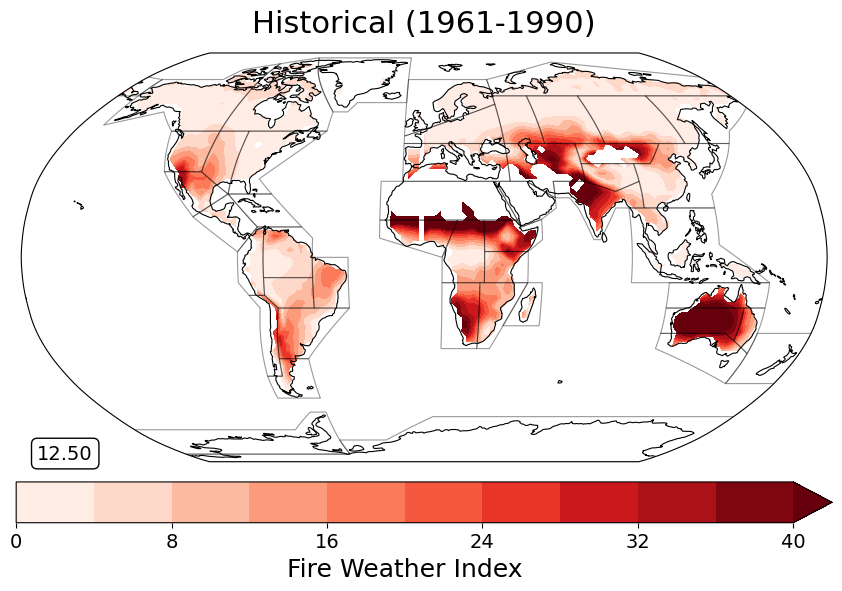

In [8]:
create_global_map(historical_fwi_mean_masked.mean('model'), 
                     projection=ccrs.Robinson(),
                     title="Historical (1961-1990)",
                     colormap='Reds',
                     colorbar_title="Fire Weather Index",
                     textbox_text=f"{historical_fwi_mean_masked_globalavg.values.item():.2f}",
                     figsize=(10.5, 6),
                     vmin=0,
                     vmax=40,
                     extend='max',
                     colorbar_levels=np.arange(0, 40.1, 4),
                     contour_levels=None,
                     hatching='///',
                     regional_boundaries='ar6',
                     hatching_style='overlay',
                     hatching_data=None,
                     show_gridlines=False)

## Anomaly

In [9]:
# Get anomalies of FWI

ssp370_fwi_mean_anomaly = ssp370_fwi_mean - historical_fwi_mean
global_fwi_mean_anomaly = global_fwi_mean - historical_fwi_mean
ssp126_fwi_mean_anomaly = ssp126_fwi_mean - historical_fwi_mean
aer126eff_fwi_mean_anomaly = global_fwi_mean_anomaly - ssp370_fwi_mean_anomaly
ghg126eff_fwi_mean_anomaly = ssp126_fwi_mean_anomaly - global_fwi_mean_anomaly

eas_fwi_mean_anomaly = eas_fwi_mean - ssp370_fwi_mean
sas_fwi_mean_anomaly = sas_fwi_mean - ssp370_fwi_mean
afr_fwi_mean_anomaly = afr_fwi_mean - ssp370_fwi_mean
nae_fwi_mean_anomaly = nae_fwi_mean - ssp370_fwi_mean


In [10]:
# Apply masks for global average value (textbox on maps)
# Non-barren land

ssp370_fwi_mean_anomaly_masked_textbox, _ = apply_masks(ssp370_fwi_mean_anomaly, 
                                                         get_significance=False, 
                                                         agreement_threshold=0.0,
                                                         threshold_type='minimum',
                                                         get_land_mask=True,
                                                         baseline_data=None)
global_fwi_mean_anomaly_masked_textbox, _ = apply_masks(global_fwi_mean_anomaly, 
                                                         get_significance=False, 
                                                         agreement_threshold=0.0,
                                                         threshold_type='minimum',
                                                         get_land_mask=True,
                                                         baseline_data=None)
ssp126_fwi_mean_anomaly_masked_textbox, _ = apply_masks(ssp126_fwi_mean_anomaly, 
                                                         get_significance=False, 
                                                         agreement_threshold=0.0,
                                                         threshold_type='minimum',
                                                         get_land_mask=True,
                                                         baseline_data=None)
aer126eff_fwi_mean_anomaly_masked_textbox, _ = apply_masks(aer126eff_fwi_mean_anomaly, 
                                                         get_significance=False, 
                                                         agreement_threshold=0.0,
                                                         threshold_type='minimum',
                                                         get_land_mask=True,
                                                         baseline_data=None)
ghg126eff_fwi_mean_anomaly_masked_textbox, _ = apply_masks(ghg126eff_fwi_mean_anomaly, 
                                                         get_significance=False, 
                                                         agreement_threshold=0.0,
                                                         threshold_type='minimum',
                                                         get_land_mask=True,
                                                         baseline_data=None)

eas_fwi_mean_anomaly_masked_textbox, _ = apply_masks(eas_fwi_mean_anomaly, 
                                                         get_significance=False, 
                                                         agreement_threshold=0.0,
                                                         threshold_type='minimum',
                                                         get_land_mask=True,
                                                         baseline_data=None)
sas_fwi_mean_anomaly_masked_textbox, _ = apply_masks(sas_fwi_mean_anomaly, 
                                                         get_significance=False, 
                                                         agreement_threshold=0.0,
                                                         threshold_type='minimum',
                                                         get_land_mask=True,
                                                         baseline_data=None)
afr_fwi_mean_anomaly_masked_textbox, _ = apply_masks(afr_fwi_mean_anomaly, 
                                                         get_significance=False, 
                                                         agreement_threshold=0.0,
                                                         threshold_type='minimum',
                                                         get_land_mask=True,
                                                         baseline_data=None)
nae_fwi_mean_anomaly_masked_textbox, _ = apply_masks(nae_fwi_mean_anomaly, 
                                                         get_significance=False, 
                                                         agreement_threshold=0.0,
                                                         threshold_type='minimum',
                                                         get_land_mask=True,
                                                         baseline_data=None)


In [11]:
# Get latitudinally weighted global average
# Non-barren land (does not need to satisfy significance threshold)

ssp370_fwi_mean_anomaly_masked_globalavg = weighted_horizontal_avg(ssp370_fwi_mean_anomaly_masked_textbox.mean('model'), ensemble = False, time = False)
global_fwi_mean_anomaly_masked_globalavg = weighted_horizontal_avg(global_fwi_mean_anomaly_masked_textbox.mean('model'), ensemble = False, time = False)
ssp126_fwi_mean_anomaly_masked_globalavg = weighted_horizontal_avg(ssp126_fwi_mean_anomaly_masked_textbox.mean('model'), ensemble = False, time = False)
aer126eff_fwi_mean_anomaly_masked_globalavg = weighted_horizontal_avg(aer126eff_fwi_mean_anomaly_masked_textbox.mean('model'), ensemble = False, time = False)
ghg126eff_fwi_mean_anomaly_masked_globalavg = weighted_horizontal_avg(ghg126eff_fwi_mean_anomaly_masked_textbox.mean('model'), ensemble = False, time = False)

eas_fwi_mean_anomaly_masked_globalavg = weighted_horizontal_avg(eas_fwi_mean_anomaly_masked_textbox.mean('model'), ensemble = False, time = False)
sas_fwi_mean_anomaly_masked_globalavg = weighted_horizontal_avg(sas_fwi_mean_anomaly_masked_textbox.mean('model'), ensemble = False, time = False)
afr_fwi_mean_anomaly_masked_globalavg = weighted_horizontal_avg(afr_fwi_mean_anomaly_masked_textbox.mean('model'), ensemble = False, time = False)
nae_fwi_mean_anomaly_masked_globalavg = weighted_horizontal_avg(nae_fwi_mean_anomaly_masked_textbox.mean('model'), ensemble = False, time = False)


In [12]:
# Apply masks for filled contour on maps
# Non-barren land and significant

agreement_threshold_val = 0.66
threshold_type_val = 'minimum'

ssp370_fwi_mean_anomaly_masked_plot, _ = apply_masks(ssp370_fwi_mean_anomaly, 
                                                         get_significance=True, 
                                                         agreement_threshold=agreement_threshold_val,
                                                         threshold_type=threshold_type_val,
                                                         get_land_mask=True,
                                                         baseline_data=ssp370_fwi_mean_anomaly)
global_fwi_mean_anomaly_masked_plot, _ = apply_masks(global_fwi_mean_anomaly, 
                                                         get_significance=True, 
                                                         agreement_threshold=agreement_threshold_val,
                                                         threshold_type=threshold_type_val,
                                                         get_land_mask=True,
                                                         baseline_data=global_fwi_mean_anomaly)
ssp126_fwi_mean_anomaly_masked_plot, _ = apply_masks(ssp126_fwi_mean_anomaly, 
                                                         get_significance=True, 
                                                         agreement_threshold=agreement_threshold_val,
                                                         threshold_type=threshold_type_val,
                                                         get_land_mask=True,
                                                         baseline_data=ssp126_fwi_mean_anomaly)
aer126eff_fwi_mean_anomaly_masked_plot, _ = apply_masks(aer126eff_fwi_mean_anomaly, 
                                                         get_significance=True, 
                                                         agreement_threshold=agreement_threshold_val,
                                                         threshold_type=threshold_type_val,
                                                         get_land_mask=True,
                                                         baseline_data=aer126eff_fwi_mean_anomaly)
ghg126eff_fwi_mean_anomaly_masked_plot, _ = apply_masks(ghg126eff_fwi_mean_anomaly, 
                                                         get_significance=True, 
                                                         agreement_threshold=agreement_threshold_val,
                                                         threshold_type=threshold_type_val,
                                                         get_land_mask=True,
                                                         baseline_data=ghg126eff_fwi_mean_anomaly)

eas_fwi_mean_anomaly_masked_plot, _ = apply_masks(eas_fwi_mean_anomaly, 
                                                         get_significance=True, 
                                                         agreement_threshold=agreement_threshold_val,
                                                         threshold_type=threshold_type_val,
                                                         get_land_mask=True,
                                                         baseline_data=eas_fwi_mean_anomaly)
sas_fwi_mean_anomaly_masked_plot, _ = apply_masks(sas_fwi_mean_anomaly, 
                                                         get_significance=True, 
                                                         agreement_threshold=agreement_threshold_val,
                                                         threshold_type=threshold_type_val,
                                                         get_land_mask=True,
                                                         baseline_data=sas_fwi_mean_anomaly)
afr_fwi_mean_anomaly_masked_plot, _ = apply_masks(afr_fwi_mean_anomaly, 
                                                         get_significance=True, 
                                                         agreement_threshold=agreement_threshold_val,
                                                         threshold_type=threshold_type_val,
                                                         get_land_mask=True,
                                                         baseline_data=afr_fwi_mean_anomaly)
nae_fwi_mean_anomaly_masked_plot, _ = apply_masks(nae_fwi_mean_anomaly, 
                                                         get_significance=True, 
                                                         agreement_threshold=agreement_threshold_val,
                                                         threshold_type=threshold_type_val,
                                                         get_land_mask=True,
                                                         baseline_data=nae_fwi_mean_anomaly)


In [13]:
# Apply masks for hatching on maps
# Non-barren land and not significant

agreement_threshold_val = 0.67
threshold_type_val = 'maximum'

ssp370_fwi_mean_anomaly_masked_hatching, _ = apply_masks(ssp370_fwi_mean_anomaly, 
                                                         get_significance=True, 
                                                         agreement_threshold=agreement_threshold_val,
                                                         threshold_type=threshold_type_val,
                                                         get_land_mask=True,
                                                         baseline_data=ssp370_fwi_mean_anomaly)
global_fwi_mean_anomaly_masked_hatching, _ = apply_masks(global_fwi_mean_anomaly, 
                                                         get_significance=True, 
                                                         agreement_threshold=agreement_threshold_val,
                                                         threshold_type=threshold_type_val,
                                                         get_land_mask=True,
                                                         baseline_data=global_fwi_mean_anomaly)
ssp126_fwi_mean_anomaly_masked_hatching, _ = apply_masks(ssp126_fwi_mean_anomaly, 
                                                         get_significance=True, 
                                                         agreement_threshold=agreement_threshold_val,
                                                         threshold_type=threshold_type_val,
                                                         get_land_mask=True,
                                                         baseline_data=ssp126_fwi_mean_anomaly)
aer126eff_fwi_mean_anomaly_masked_hatching, _ = apply_masks(aer126eff_fwi_mean_anomaly, 
                                                         get_significance=True, 
                                                         agreement_threshold=agreement_threshold_val,
                                                         threshold_type=threshold_type_val,
                                                         get_land_mask=True,
                                                         baseline_data=aer126eff_fwi_mean_anomaly)
ghg126eff_fwi_mean_anomaly_masked_hatching, _ = apply_masks(ghg126eff_fwi_mean_anomaly, 
                                                         get_significance=True, 
                                                         agreement_threshold=agreement_threshold_val,
                                                         threshold_type=threshold_type_val,
                                                         get_land_mask=True,
                                                         baseline_data=ghg126eff_fwi_mean_anomaly)

eas_fwi_mean_anomaly_masked_hatching, _ = apply_masks(eas_fwi_mean_anomaly, 
                                                         get_significance=True, 
                                                         agreement_threshold=agreement_threshold_val,
                                                         threshold_type=threshold_type_val,
                                                         get_land_mask=True,
                                                         baseline_data=eas_fwi_mean_anomaly)
sas_fwi_mean_anomaly_masked_hatching, _ = apply_masks(sas_fwi_mean_anomaly, 
                                                         get_significance=True, 
                                                         agreement_threshold=agreement_threshold_val,
                                                         threshold_type=threshold_type_val,
                                                         get_land_mask=True,
                                                         baseline_data=sas_fwi_mean_anomaly)
afr_fwi_mean_anomaly_masked_hatching, _ = apply_masks(afr_fwi_mean_anomaly, 
                                                         get_significance=True, 
                                                         agreement_threshold=agreement_threshold_val,
                                                         threshold_type=threshold_type_val,
                                                         get_land_mask=True,
                                                         baseline_data=afr_fwi_mean_anomaly)
nae_fwi_mean_anomaly_masked_hatching, _ = apply_masks(nae_fwi_mean_anomaly, 
                                                         get_significance=True, 
                                                         agreement_threshold=agreement_threshold_val,
                                                         threshold_type=threshold_type_val,
                                                         get_land_mask=True,
                                                         baseline_data=nae_fwi_mean_anomaly)

/home/jupyterhub/miniconda-persad/envs/lab/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/jupyterhub/miniconda-persad/envs/lab/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/jupyterhub/miniconda-persad/envs/lab/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/jupyterhub/miniconda-persad/envs/lab/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/hom

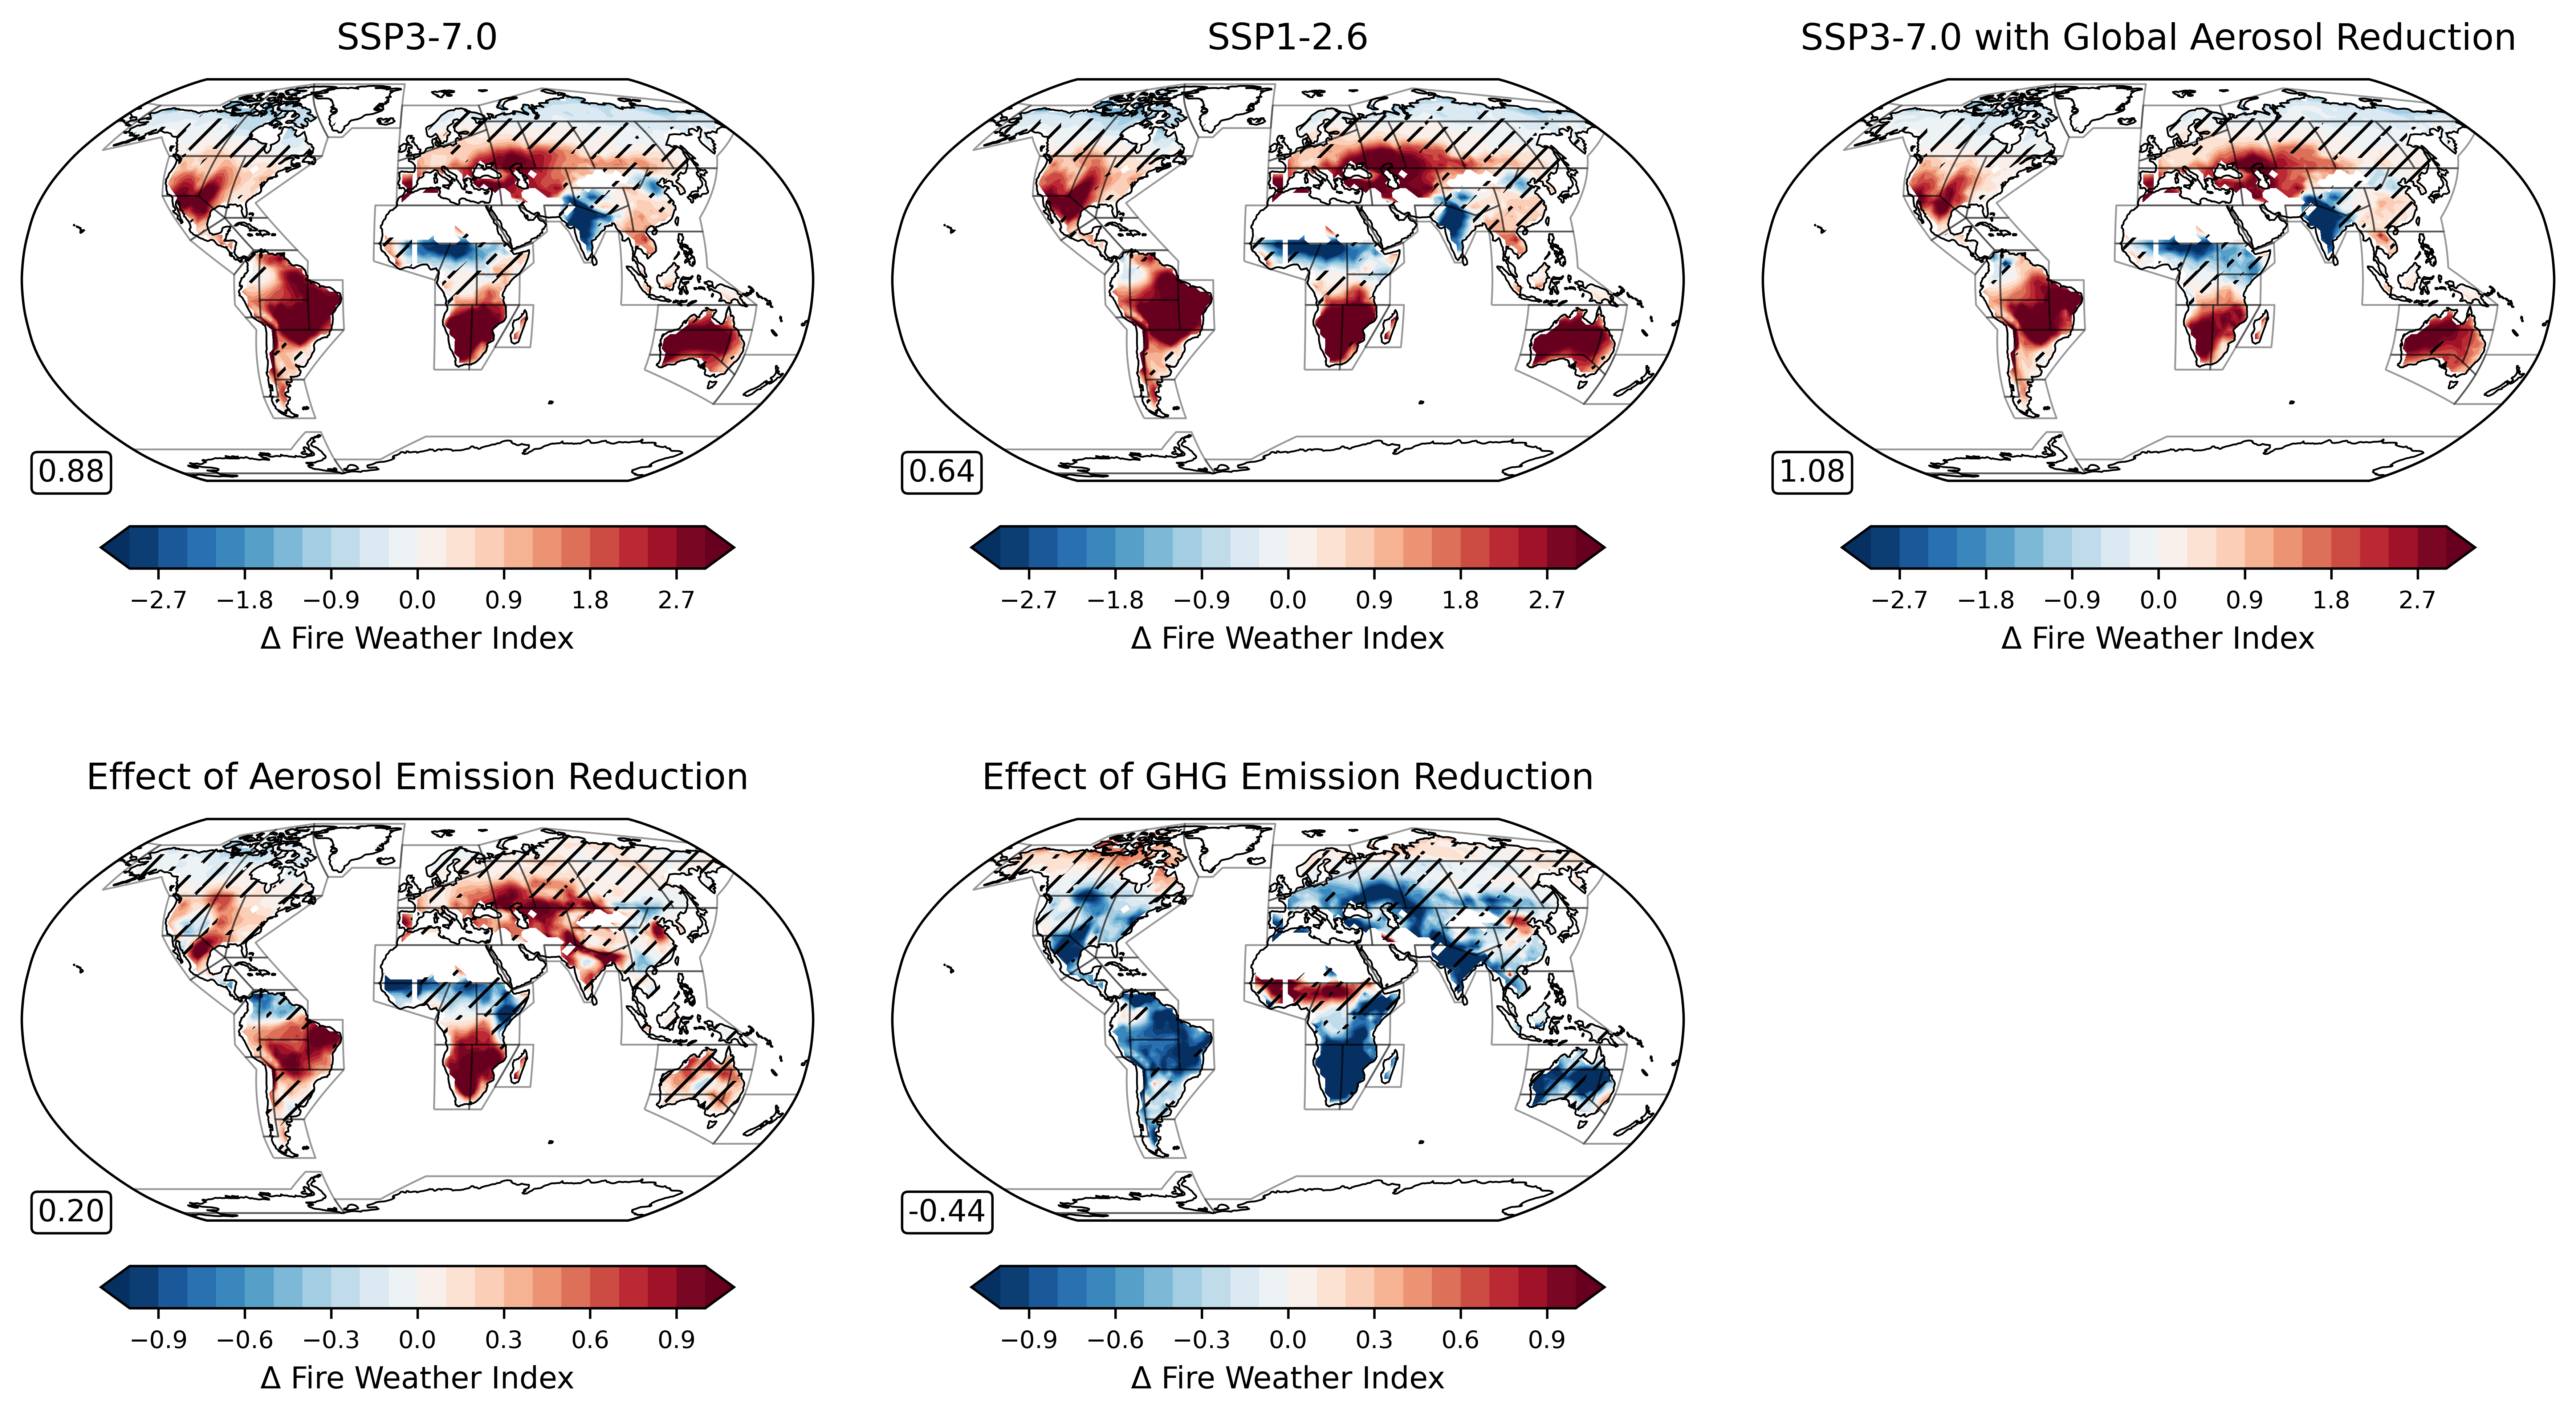

In [14]:
data_list = [ssp370_fwi_mean_anomaly_masked_plot.mean('model'), global_fwi_mean_anomaly_masked_plot.mean('model'), ssp126_fwi_mean_anomaly_masked_plot.mean('model'),
             aer126eff_fwi_mean_anomaly_masked_plot.mean('model'), ghg126eff_fwi_mean_anomaly_masked_plot.mean('model'),
             ]

title_list = ['SSP3-7.0', 'SSP1-2.6', 'SSP3-7.0 with Global Aerosol Reduction', 'Effect of Aerosol Emission Reduction', 'Effect of GHG Emission Reduction']

textbox_text_list = [f"{ssp370_fwi_mean_anomaly_masked_globalavg.values.item():.2f}",
                     f"{ssp126_fwi_mean_anomaly_masked_globalavg.values.item():.2f}",
                     f"{global_fwi_mean_anomaly_masked_globalavg.values.item():.2f}",
                     f"{aer126eff_fwi_mean_anomaly_masked_globalavg.values.item():.2f}",
                     f"{ghg126eff_fwi_mean_anomaly_masked_globalavg.values.item():.2f}",
                     ]

hatching_data_list = [ssp370_fwi_mean_anomaly_masked_hatching.isel(model=0),
                      ssp126_fwi_mean_anomaly_masked_hatching.isel(model=0),
                      global_fwi_mean_anomaly_masked_hatching.isel(model=0),
                      aer126eff_fwi_mean_anomaly_masked_hatching.isel(model=0),
                      ghg126eff_fwi_mean_anomaly_masked_hatching.isel(model=0)
                      ]

vmins_list = [-3, -3, -3, -1, -1]
vmaxs_list = [3, 3, 3, 1, 1]

colorbar_levels_list = [np.arange(-3, 3.1, 0.3), np.arange(-3, 3.1, 0.3), np.arange(-3, 3.1, 0.3), 
                        np.arange(-1, 1.1, 0.1), np.arange(-1, 1.1, 0.1)]

fig, axes = create_global_map_grid(
    data_list, 
    rows=2, 
    cols=3,
    main_title=None,
    projection=ccrs.Robinson(),
    titles=title_list,
    colormaps='RdBu_r',
    colorbar_titles="Δ Fire Weather Index",
    textbox_texts=textbox_text_list,
    # figsize=(20, 14),
    vmins=vmins_list,
    vmaxs=vmaxs_list,
    extends='both',
    colorbar_levels=colorbar_levels_list,
    hatchings='///',
    regional_boundaries='ar6',
    hatching_styles='overlay',
    hatching_data=hatching_data_list,
    show_gridlines=False,
    ramip_regions=False,
)
fig.set_dpi(600)


/home/jupyterhub/miniconda-persad/envs/lab/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


/home/jupyterhub/miniconda-persad/envs/lab/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/jupyterhub/miniconda-persad/envs/lab/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/jupyterhub/miniconda-persad/envs/lab/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


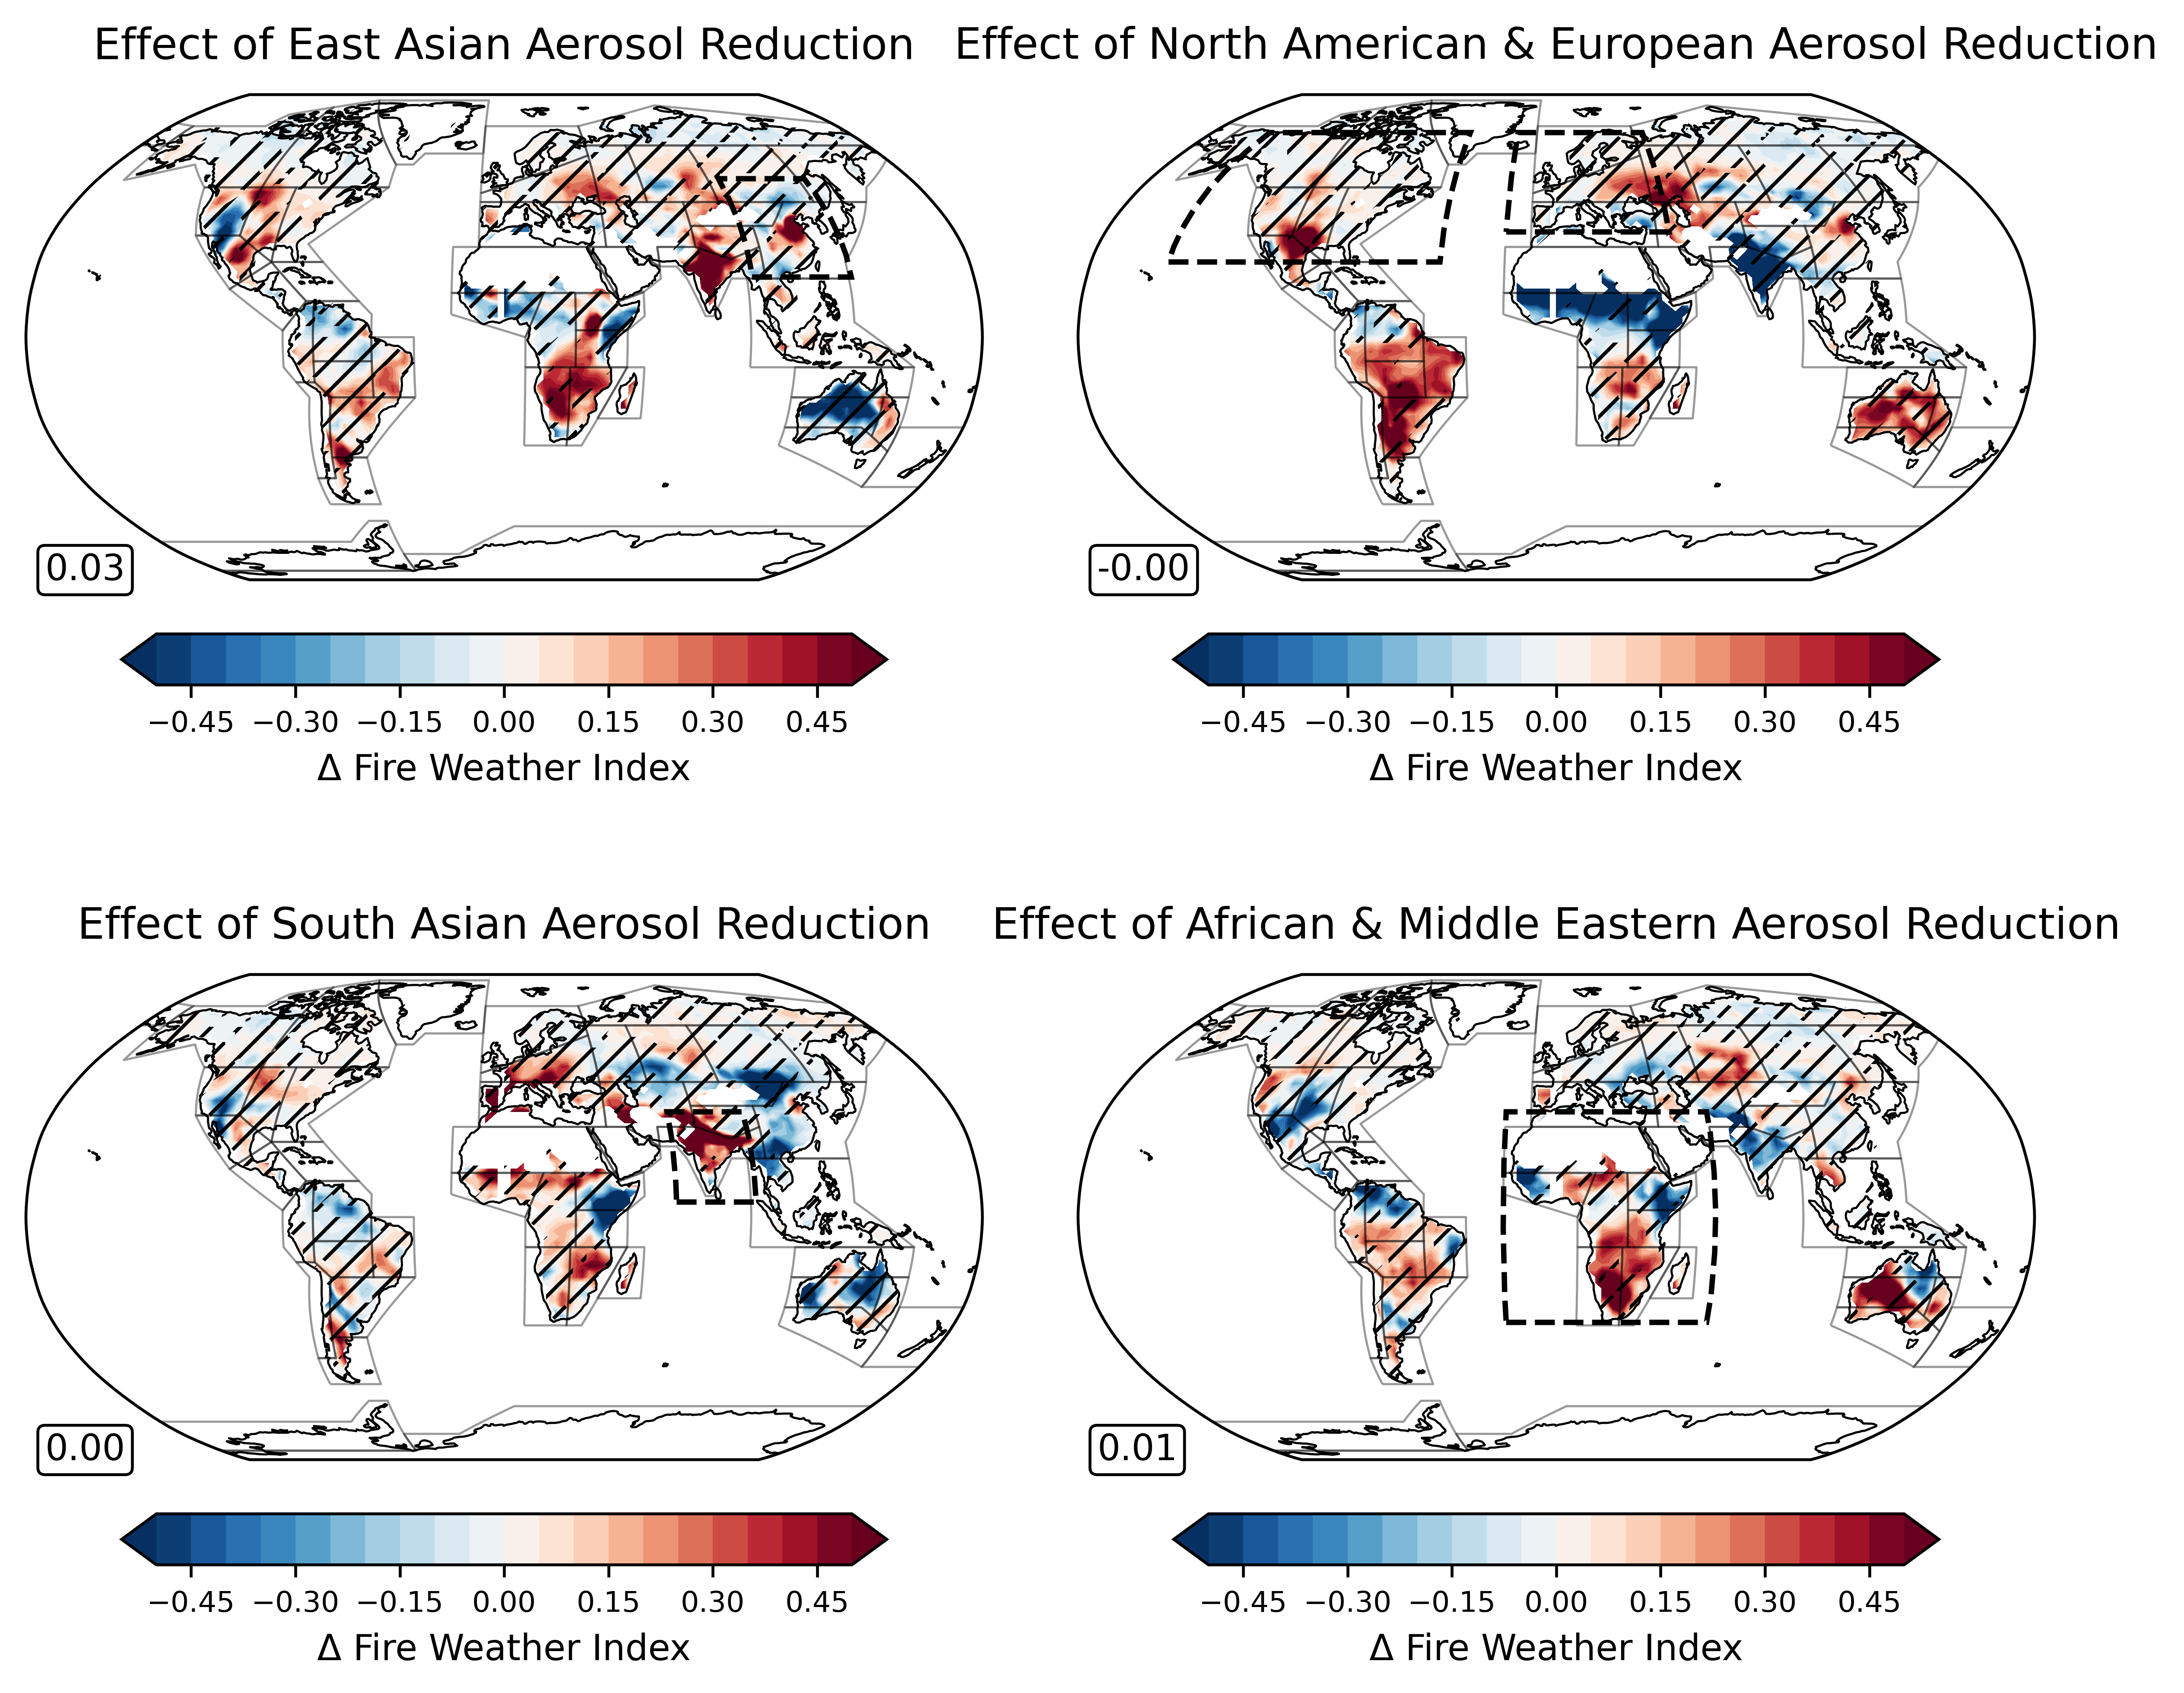

In [15]:
data_list = [eas_fwi_mean_anomaly_masked_plot.mean('model'), nae_fwi_mean_anomaly_masked_plot.mean('model'), 
             sas_fwi_mean_anomaly_masked_plot.mean('model'), afr_fwi_mean_anomaly_masked_plot.mean('model'),
             ]

title_list = ['Effect of East Asian Aerosol Reduction', 
              'Effect of North American & European Aerosol Reduction', 
              'Effect of South Asian Aerosol Reduction', 
              'Effect of African & Middle Eastern Aerosol Reduction']

textbox_text_list = [f"{eas_fwi_mean_anomaly_masked_globalavg.values.item():.2f}",
                     f"{nae_fwi_mean_anomaly_masked_globalavg.values.item():.2f}",
                     f"{sas_fwi_mean_anomaly_masked_globalavg.values.item():.2f}",
                     f"{afr_fwi_mean_anomaly_masked_globalavg.values.item():.2f}",
                     ]

hatching_data_list = [eas_fwi_mean_anomaly_masked_hatching.isel(model=0),
                      nae_fwi_mean_anomaly_masked_hatching.isel(model=0),
                      sas_fwi_mean_anomaly_masked_hatching.isel(model=0),
                      afr_fwi_mean_anomaly_masked_hatching.isel(model=0),
                      ]

vmins_list = [-0.5, -0.5, -0.5, -0.5]
vmaxs_list = [0.5, 0.5, 0.5, 0.5]

colorbar_levels_list = [np.arange(-0.5, 0.51, 0.05), np.arange(-0.5, 0.51, 0.05),
                        np.arange(-0.5, 0.51, 0.05), np.arange(-0.5, 0.51, 0.05)]

fig, axes = create_global_map_grid(
    data_list, 
    rows=2, 
    cols=2,
    main_title=None,
    projection=ccrs.Robinson(),
    titles=title_list,
    colormaps='RdBu_r',
    colorbar_titles="Δ Fire Weather Index",
    textbox_texts=textbox_text_list,
    # figsize=(20, 14),
    vmins=vmins_list,
    vmaxs=vmaxs_list,
    extends='both',
    colorbar_levels=colorbar_levels_list,
    hatchings='///',
    regional_boundaries='ar6',
    hatching_styles='overlay',
    hatching_data=hatching_data_list,
    show_gridlines=False,
    ramip_regions=['east_asia', 'north_america_europe', 'south_asia', 'africa_mideast'],
)
fig.set_dpi(600)
